<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/8_How_to_Backtest_a_Bollinger_Bands_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anade Davis - Financial Data Scientist - [Linkedin](https://https://www.linkedin.com/in/anadedatascientist/)

**In this Model I will be Backtesting the Bollinger Bands Strategy Investors use with the EOS (Eaton Vance Enhanced Equity Income Fund)**

"Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and contract when volatility decreases" ~ [Source](https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_bands)

References:

https://github.com/PacktPublishing/Python-for-Finance-Cookbook/blob/master/Chapter%2002/chapter_2.ipynb

https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_bands

In [1]:
!pip install backtrader #Code to Install Backtrader

     |████████████████████████████████| 419kB 2.8MB/s 


In [2]:
pip install yfinance #Code to install yfinance

     |████████████████████████████████| 5.5MB 3.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=bc7b26857050e4bbeeb2d7f83e787dddfe6f481c7e77d58a7f310c4289e9d8da
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
from datetime import datetime #Code to display time
import pandas as pd #Used for high level Data Indexing processes
import yfinance as yf #Code to import Yahoo Finance API
import backtrader as bt #A Backtesting Library for Quantitative Analysis

In [4]:
import matplotlib.pyplot as plt #Machine Learning library to create plots and data visualizations


In [5]:
class BBand_Strategy(bt.Strategy):
    params = (('period', 31),
              ('devfactor', 2.0),)

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

        # add Bollinger Bands indicator and track the buy/sell signals
        self.b_band = bt.ind.BollingerBands(self.datas[0], 
                                            period=self.p.period, 
                                            devfactor=self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0], 
                                           self.b_band.lines.bot)
        self.sell_signal = bt.ind.CrossOver(self.datas[0], 
                                            self.b_band.lines.top)

    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(
                    f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # set no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                # sell order
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)

In [6]:
#The code to pull data from Yahoo Finance API
EOSSTOCK= bt.feeds.YahooFinanceData(dataname='EOS',fromdate=datetime(2018, 9, 30),todate=datetime(2020, 9, 30))
#We look at EOS returns over a year

In [7]:
class BBand_Strategy(bt.Strategy):
    params = (('period', 32),
              ('devfactor', 2.0),)

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        # keep track of pending orders/buy price/buy commission
        self.order = None
        self.price = None
        self.comm = None

        # add Bollinger Bands indicator and track the buy/sell signals
        self.b_band = bt.ind.BollingerBands(self.datas[0], 
                                            period=self.p.period, 
                                            devfactor=self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0], 
                                           self.b_band.lines.bot)
        self.sell_signal = bt.ind.CrossOver(self.datas[0], 
                                            self.b_band.lines.top)

    def log(self, txt):
        '''Logging function'''
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f'{dt}, {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return

        # report executed order
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    f'BUY EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )
                self.price = order.executed.price
                self.comm = order.executed.comm
            else:
                self.log(
                    f'SELL EXECUTED --- Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Commission: {order.executed.comm:.2f}'
                )

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log('Order Failed')

        # set no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(f'OPERATION RESULT --- Gross: {trade.pnl:.2f}, Net: {trade.pnlcomm:.2f}')

    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                # calculate the max number of shares ('all-in')
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                self.log(f'BUY CREATED --- Size: {size}, Cash: {self.broker.getcash():.2f}, Open: {self.data_open[0]}, Close: {self.data_close[0]}')
                self.buy(size=size)
        else:
            if self.sell_signal < 0:
                # sell order
                self.log(f'SELL CREATED --- Size: {self.position.size}')
                self.sell(size=self.position.size)

In [8]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)

cerebro.addstrategy(BBand_Strategy)
cerebro.adddata(EOSSTOCK)
cerebro.broker.setcash(100000.0)
#cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

In [9]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
backtest_result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2018-11-27, BUY CREATED --- Size: 7587, Cash: 100000.00, Open: 13.18, Close: 13.28
2018-11-27, BUY EXECUTED --- Price: 13.18, Cost: 99996.66, Commission: 0.00
2019-04-25, SELL CREATED --- Size: 7587
2019-04-25, SELL EXECUTED --- Price: 15.36, Cost: 99996.66, Commission: 0.00
2019-04-25, OPERATION RESULT --- Gross: 16539.66, Net: 16539.66
2019-06-06, BUY CREATED --- Size: 7890, Cash: 116539.66, Open: 14.77, Close: 14.87
2019-06-06, BUY EXECUTED --- Price: 14.77, Cost: 116535.30, Commission: 0.00
2019-11-22, SELL CREATED --- Size: 7890
2019-11-22, SELL EXECUTED --- Price: 16.43, Cost: 116535.30, Commission: 0.00
2019-11-22, OPERATION RESULT --- Gross: 13097.40, Net: 13097.40
2020-03-03, BUY CREATED --- Size: 8051, Cash: 129637.06, Open: 16.1, Close: 15.97
2020-03-03, BUY EXECUTED --- Price: 16.10, Cost: 129621.10, Commission: 0.00
2020-07-23, SELL CREATED --- Size: 8051
2020-07-23, SELL EXECUTED --- Price: 17.96, Cost: 129621.10, Commission: 0.00
2020-

Our Bollinger Bands Strategy has produced more than $44,000 in Profits!

<IPython.core.display.Javascript object>

[[<Figure size 1152x648 with 4 Axes>]]

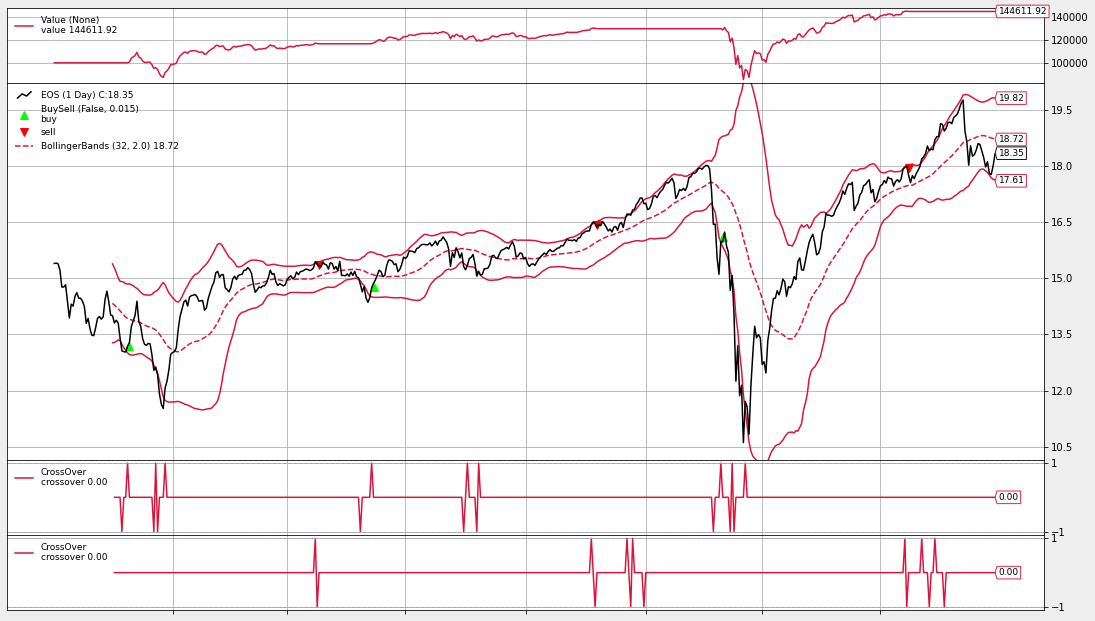

In [10]:
#This entire code block is needed to display Simple Moving Average plots
#This otherwise would not take so much code but it seems to only work in Google Colab this way
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams #Creates parameters for our plot
rcParams['figure.figsize'] = 16,9 #size
rcParams['figure.facecolor'] = '#eeeeee' #Color scheme
plt.plot() #The Plot Code
plt.close()
cerebro.plot(iplot=True, volume=False)

Now Lets create a Data Visual that shows us the periods of Strongest Returns!

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

<IPython.core.display.Javascript object>

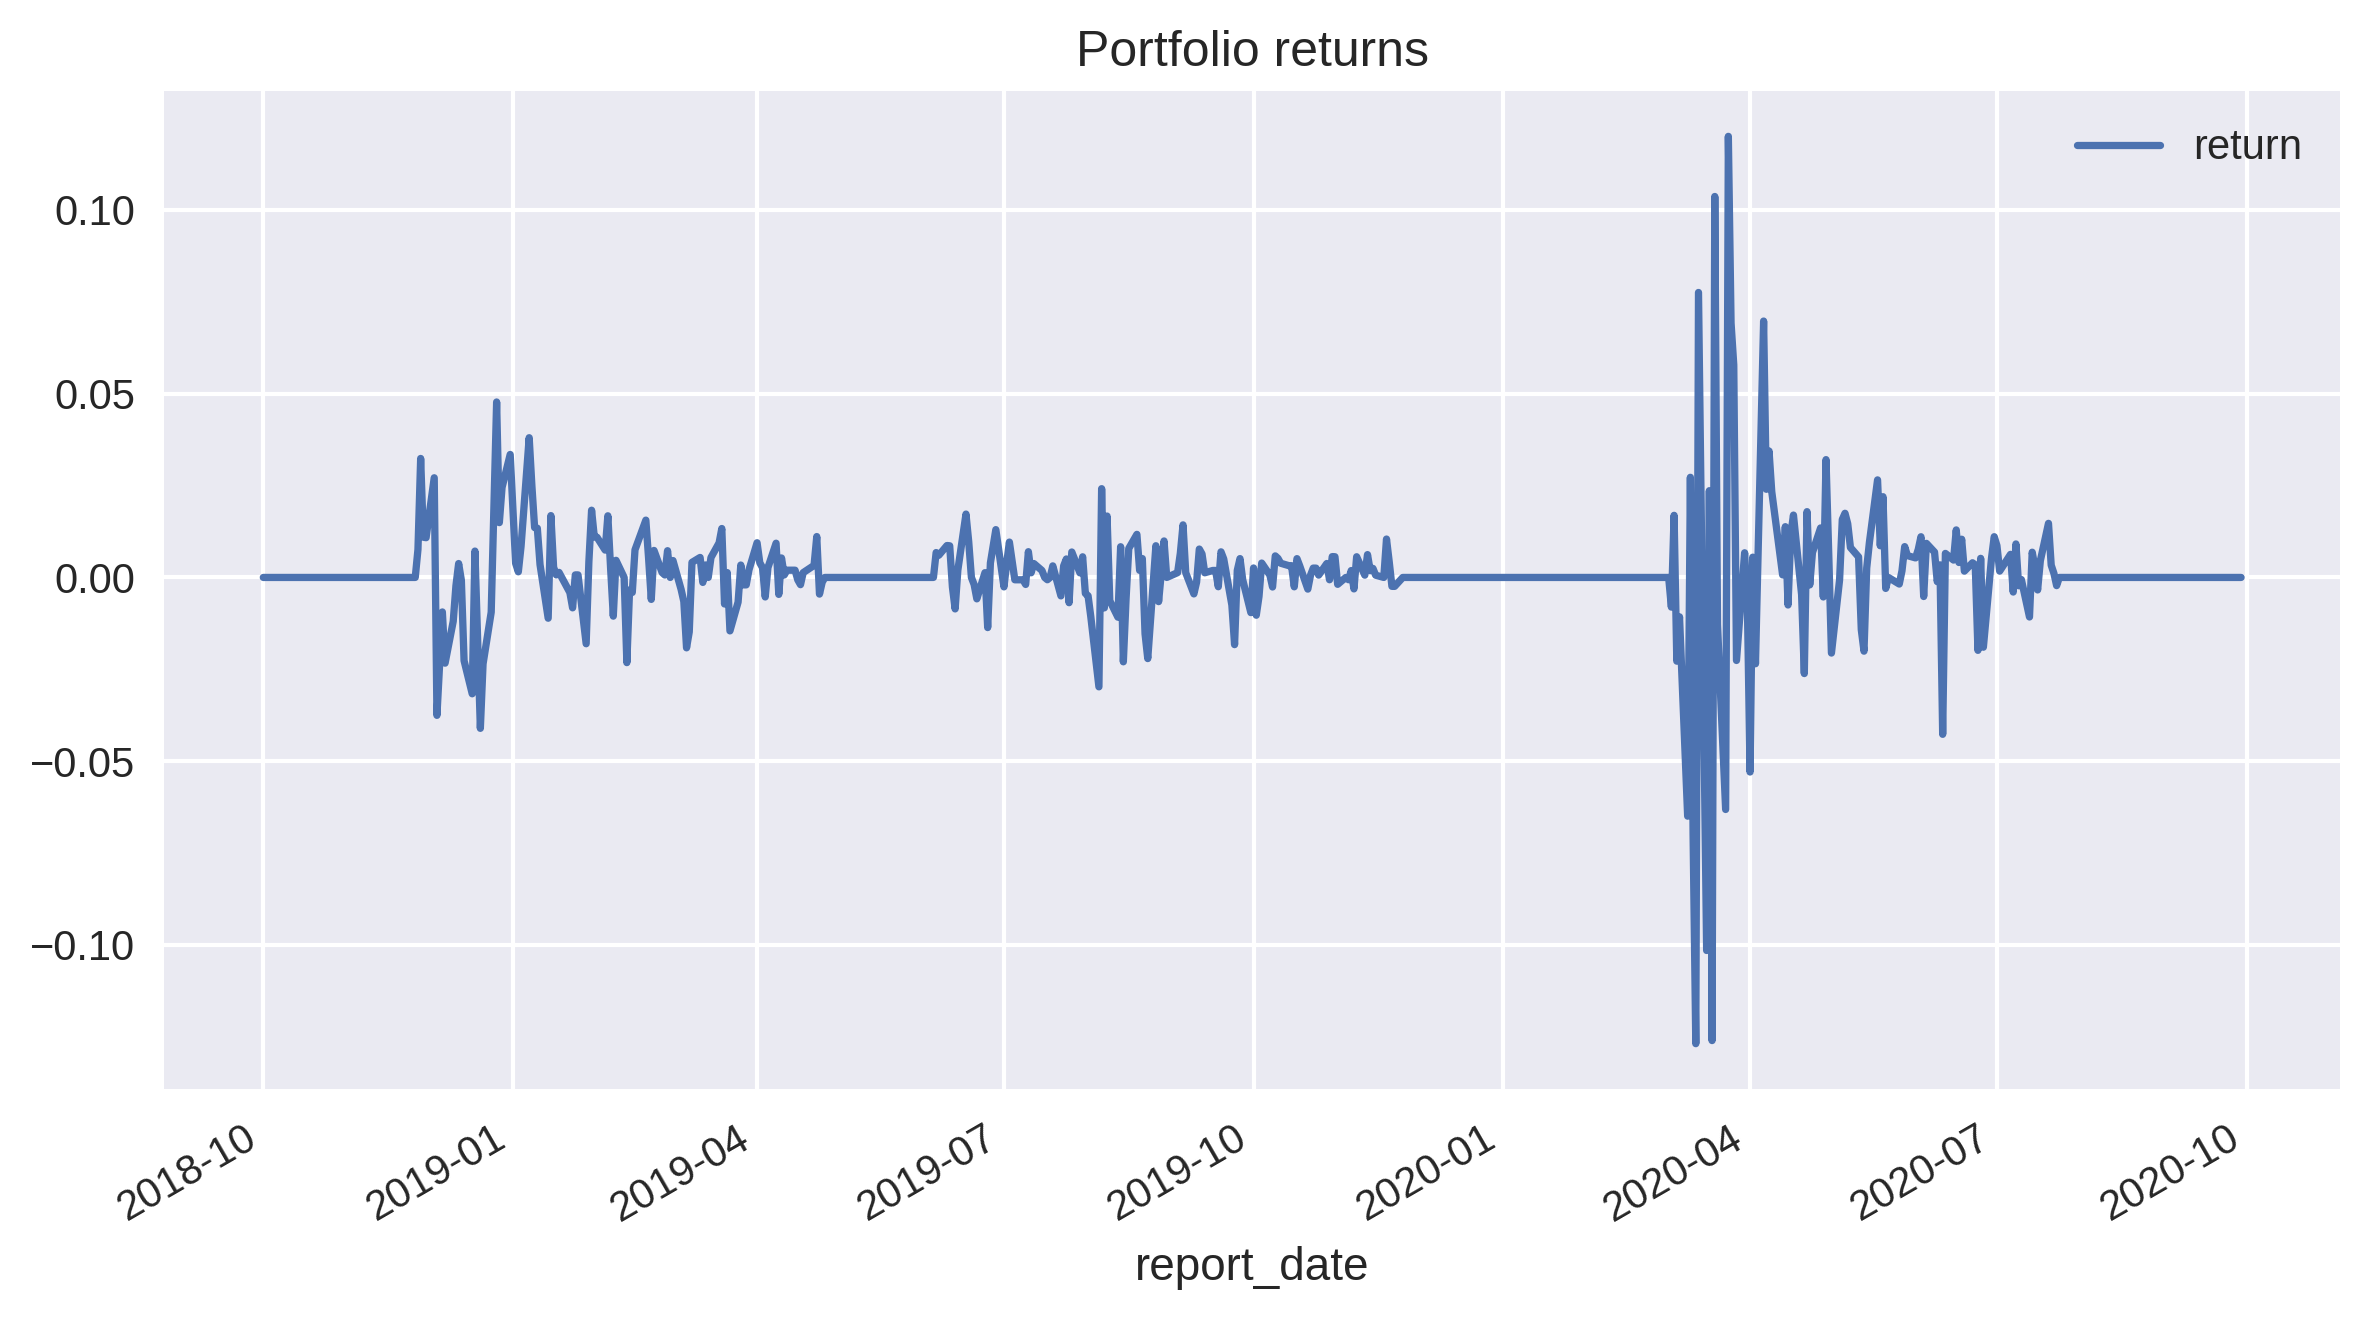

In [12]:
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
returns_df = pd.DataFrame(list(returns_dict.items()), 
                          columns = ['report_date', 'return']) \
               .set_index('report_date')
returns_df.plot(title='Portfolio returns')

plt.tight_layout()
plt.show()